## Sessionize User Activity


### Goal

This is another challenge where your data is stored in a JSON file. Each row in this JSON stores info about all user searches within a session.

Analyzing user behavior within the same session is often crucial. Clustering users based on their browsing behavior is probably the most important step if you want to personalize your site.

The goal of this challenge is to build the foundation of personalization by identifying searches likely to happen together and cluster users based on their session searches.


### Challenge Description

Company XYZ is a Online Travel Agent site, such as Expedia, Booking.com, etc.

They store their data in JSON files. Each row in the json shows all different cities which have been searched for by a user within the same session (as well as some other info about the user). That is, if I go to expedia and look for hotels in NY and SF within the same session, the corresponding JSON row will show my user id, some basic info about myself and the two cities.

You are given the following tasks:

There was a bug in the code and one country didn’t get logged. It just shows up as an empty field (“”). Can you guess which country was that? How?


For each city, find the most likely city to be also searched for within the same session.


Travel sites are browsed by two kinds of users. Users who are actually planning a trip and users who just dream about a vacation. The first ones have obviously a much higher purchasing intent.
Users planning a trip often search for cities close to each other, while users who search for cities far away from each other are often just dreaming about a vacation. That is, a user searching for LA, SF and Las Vegas in the same session is much more likely to book a hotel than a user searching for NY, Paris, Kuala Lumpur (makes sense, right?).
Based on this idea, come up with an algorithm that clusters sessions into two groups: high intent and low intent. Explain all assumptions you make along the way.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

13_Sessionize_User_Activity.ipynb  worldcities.csv*
city_searches.json


In [3]:
df = pd.read_json('city_searches.json')
print(df.shape)
df.head()

(20022, 4)


,cities,session_id,unix_timestamp,user
0,"[San Jose CA, Montreal QC]",[D258NVMV202LS],[1442640552],"[[{'user_id': 5749, 'joining_date': '2015-04-0..."
1,[New York NY],[TDG10UKG7I4LR],[1432110137],"[[{'user_id': 10716, 'joining_date': '2015-03-..."
2,"[Montreal QC, Quebec QC]",[OH4ZDIGN9BLQS],[1437049311],"[[{'user_id': 2941, 'joining_date': '2015-03-1..."
3,[Chicago IL],[CWHIAYKQ7RA28],[1432215908],"[[{'user_id': 2164, 'joining_date': '2015-03-2..."
4,"[Toronto ON, Houston TX]",[GI8GZJAWAC80P],[1443556226],"[[{'user_id': 10493, 'joining_date': '2015-03-..."


* city_searches - a list of searches happening within the same session

Fields:

* session_id : session id. Unique by row
* unix_timestamp : unixtime stamp of when the session started
* cities : the unique cities which were searched for within the same session by a user
* user : it is has the following nested fields:

        user_id: the id of the user
        joining_date: when the user created the account
        country: where the user is based

In [4]:
df.isnull().sum()

cities            0
session_id        0
unix_timestamp    0
user              0
dtype: int64

In [5]:
df.dtypes

cities            object
session_id        object
unix_timestamp    object
user              object
dtype: object

## Question I 

There was a bug in the code and one country didn’t get logged. It just shows up as an empty field (“”). Can you guess which country was that? How?

In [6]:
#df.user[1]
df.user[0][0][0]['country']

'FR'

In [7]:
countries = []
cities = []

for i in range(df.shape[0]):
    country = df.user[i][0][0]['country'] 
    city =  df.cities[i]
    if country:
        cities.append(city)
        if country not in countries:
            countries.append(country)

In [8]:
countries

['FR', 'DE', 'US', 'IT', 'UK', 'ES']

Canada is missing.

In [9]:
# Yes, a lot of Canada cities, so it is Canada.

for i in range(df.shape[0]):
    country = df.user[i][0][0]['country'] 
    city =  df.cities[i]
    if not country and i<=300:
        print(df.cities[i])

['Montreal QC, Quebec QC']
['New York NY']
['Los Angeles CA']
['New York NY, Toronto ON']
['New York NY']
['Vancouver BC, Houston TX']
['Philadelphia PA, Houston TX']
['New York NY, Vancouver BC']
['Los Angeles CA']
['San Diego CA, Santa Ana CA']
['San Diego CA, Santa Ana CA, Anaheim CA']
['Houston TX']
['Philadelphia PA, Vancouver BC']
['Toronto ON']
['Calgary AB, Los Angeles CA']
['Montreal QC']
['San Antonio TX, Corpus Christi TX']
['Los Angeles CA, Toronto ON']
['New York NY']
['New York NY, Jersey City NJ']
['New York NY']
['Los Angeles CA']
['Los Angeles CA']
['New York NY']
['New York NY, Toronto ON']
['Los Angeles CA']
['New York NY']
['Houston TX, Los Angeles CA']
['Columbus OH']
['Vancouver BC, Edmonton AB, Victoria BC']
['San Antonio TX, Arlington TX']
['Toronto ON, Oshawa ON']
['Edmonton AB']
['Toronto ON, Buffalo NY']
['New York NY']
['San Diego CA, New York NY']
['Columbus OH']
['Vancouver BC']
['Montreal QC']
['San Antonio TX']
['Dallas TX, Los Angeles CA']
['San Diego C

## Question II

For each city, find the most likely city to be also searched for within the same session.


In [10]:
# check split

df.cities[0][0].split(',')

['San Jose CA', ' Montreal QC']

In [11]:
cities = []

for i in df.iloc[:,0]:
    for city in i[0].split(', '):
        if city not in cities:
            cities.append(city)

In [12]:
print(len(cities))
cities

87


['San Jose CA',
 'Montreal QC',
 'New York NY',
 'Quebec QC',
 'Chicago IL',
 'Toronto ON',
 'Houston TX',
 'Los Angeles CA',
 'San Diego CA',
 'Santa Ana CA',
 'Saint Catharines-Niagara ON',
 'Edmonton AB',
 'Philadelphia PA',
 'Vancouver BC',
 'Detroit MI',
 'Phoenix AZ',
 'Calgary AB',
 'Jersey City NJ',
 'Newark NJ',
 'Columbus OH',
 'Portland OR',
 'Austin TX',
 'Boston MA',
 'Buffalo NY',
 'Anaheim CA',
 'Indianapolis IN',
 'OTTAWA ON',
 'Riverside CA',
 'Long Beach CA',
 'Toledo OH',
 'San Antonio TX',
 'Jacksonville FL',
 'Baltimore MD',
 'Hamilton ON',
 'Seattle WA',
 'Victoria BC',
 'Corpus Christi TX',
 'Miami FL',
 'Hialeah FL',
 'Saint Petersburg FL',
 'Tampa FL',
 'Glendale AZ',
 'Milwaukee WI',
 'Madison WI',
 'Dallas TX',
 'WASHINGTON DC',
 'Stockton CA',
 'San Francisco CA',
 'Oshawa ON',
 'Arlington TX',
 'Chandler AZ',
 'Louisville KY',
 'Plano TX',
 'Mesa AZ',
 'Kitchener ON',
 'Cincinnati OH',
 'Chesapeake VA',
 'Virginia Beach VA',
 'Lexington KY',
 'Fort Worth TX

In [13]:
# extract city information

cities2 = []

for i in df.iloc[:,0]:
    cities2.append(i[0].split(', '))
    
print(len(cities2))
cities2[:10]

20022


[['San Jose CA', 'Montreal QC'],
 ['New York NY'],
 ['Montreal QC', 'Quebec QC'],
 ['Chicago IL'],
 ['Toronto ON', 'Houston TX'],
 ['New York NY'],
 ['Los Angeles CA'],
 ['San Diego CA', 'Santa Ana CA'],
 ['New York NY'],
 ['Toronto ON', 'Saint Catharines-Niagara ON']]

In [14]:
from collections import Counter

def mostcity(city, cities2):
    temp_list = []
    for i in cities2:
        if city in i:
            for j in i:
                temp_list.append(j)

    dict_temp = dict(Counter(temp_list))
    mostlikely = sorted(dict_temp.items(), key=lambda x:x[1], reverse= True)[1][0]
    if mostlikely == city:
        mostlikely = sorted(dict_temp.items(), key=lambda x:x[1], reverse= True)[0][0]
    return mostlikely

In [15]:
for city in cities:
    print(city,": ",mostcity(city, cities2))

San Jose CA :  Oakland CA
Montreal QC :  New York NY
New York NY :  Jersey City NJ
Quebec QC :  Montreal QC
Chicago IL :  New York NY
Toronto ON :  New York NY
Houston TX :  New York NY
Los Angeles CA :  New York NY
San Diego CA :  Santa Ana CA
Santa Ana CA :  Los Angeles CA
Saint Catharines-Niagara ON :  Toronto ON
Edmonton AB :  Calgary AB
Philadelphia PA :  New York NY
Vancouver BC :  New York NY
Detroit MI :  Windsor ON
Phoenix AZ :  Glendale AZ
Calgary AB :  Vancouver BC
Jersey City NJ :  New York NY
Newark NJ :  New York NY
Columbus OH :  Cincinnati OH
Portland OR :  Vancouver BC
Austin TX :  Houston TX
Boston MA :  New York NY
Buffalo NY :  Toronto ON
Anaheim CA :  Los Angeles CA
Indianapolis IN :  Chicago IL
OTTAWA ON :  Montreal QC
Riverside CA :  Los Angeles CA
Long Beach CA :  Los Angeles CA
Toledo OH :  Detroit MI
San Antonio TX :  Houston TX
Jacksonville FL :  Tampa FL
Baltimore MD :  New York NY
Hamilton ON :  Toronto ON
Seattle WA :  Vancouver BC
Victoria BC :  Vancouver

In [16]:
# double check:
#city = 'Norfolk VA'
city = 'Mesa AZ'

temp_list = []
for i in cities2:
    if city in i:
        for j in i:
            temp_list.append(j)

#temp_list
dict_temp = dict(Counter(temp_list))
sorted(dict_temp.items(), key=lambda x:x[1], reverse= True)

[('Phoenix AZ', 35),
 ('Mesa AZ', 35),
 ('Chandler AZ', 17),
 ('Scottsdale AZ', 13),
 ('Glendale AZ', 7),
 ('Tucson AZ', 3)]

## Question III

Travel sites are browsed by two kinds of users. Users who are actually planning a trip and users who just dream about a vacation. The first ones have obviously a much higher purchasing intent.

Users planning a trip often search for cities close to each other, while users who search for cities far away from each other are often just dreaming about a vacation. That is, a user searching for LA, SF and Las Vegas in the same session is much more likely to book a hotel than a user searching for NY, Paris, Kuala Lumpur (makes sense, right?).

Based on this idea, come up with an algorithm that clusters sessions into two groups: high intent and low intent. Explain all assumptions you make along the way.

Download data from:

https://simplemaps.com/data/world-cities

In [17]:
ls

13_Sessionize_User_Activity.ipynb  worldcities.csv*
city_searches.json


In [18]:
# Import city location data

df_city = pd.read_csv('worldcities.csv')
print(df_city.shape)
df_city.head()

(15493, 11)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [19]:
city = 'Fort Worth TX'[:-3].lower()
for i in df_city.city_ascii:
    if i.lower() == city:
        print(i.lower())

fort worth


In [20]:
city_dict = {}

for city in cities:
    #print(city[:-3].lower())
    for i in range(df_city.shape[0]):
        if df_city.city_ascii[i].lower() == city[:-3].lower():
            if df_city.iso2[i] in ['FR', 'DE', 'US', 'IT', 'UK', 'ES', 'CA'] and city not in city_dict:
                city_dict[city] = [df_city.lat[i], df_city.lng[i]]

In [21]:
#len(city_dict)
city_dict['Saint Catharines-Niagara ON'] = [43.1594,-79.2469]
city_dict['Saint Petersburg FL'] = [27.7676, -82.6403]
city_dict['Saint Paul MN'] = [44.9537, -93.0900]

for city in cities:
    if city not in city_dict:
        print(city)
        
city_dict

{'San Jose CA': [37.3021, -121.8489],
 'Montreal QC': [45.5, -73.5833],
 'New York NY': [40.6943, -73.9249],
 'Quebec QC': [46.84, -71.2456],
 'Chicago IL': [41.8373, -87.6862],
 'Toronto ON': [43.7, -79.42],
 'Houston TX': [29.7869, -95.3905],
 'Los Angeles CA': [34.1139, -118.4068],
 'San Diego CA': [32.8312, -117.1225],
 'Santa Ana CA': [33.7366, -117.8819],
 'Edmonton AB': [53.55, -113.5],
 'Philadelphia PA': [40.0077, -75.1339],
 'Vancouver BC': [49.2734, -123.1216],
 'Detroit MI': [42.3834, -83.1024],
 'Phoenix AZ': [33.5722, -112.0891],
 'Calgary AB': [51.083, -114.08],
 'Jersey City NJ': [40.7161, -74.0683],
 'Newark NJ': [40.7245, -74.1725],
 'Columbus OH': [39.986, -82.9851],
 'Portland OR': [45.5371, -122.65],
 'Austin TX': [30.3006, -97.7517],
 'Boston MA': [42.3188, -71.0846],
 'Buffalo NY': [42.9017, -78.8487],
 'Anaheim CA': [33.839, -117.8573],
 'Indianapolis IN': [39.7771, -86.1458],
 'OTTAWA ON': [45.4167, -75.7],
 'Riverside CA': [33.9381, -117.3948],
 'Long Beach CA

In [22]:
# define distance function

def distance(city1, city2, city_dict):
    lat1 = city_dict[city1][0]
    long1 = city_dict[city1][1]
    
    lat2 = city_dict[city2][0]
    long2 = city_dict[city2][1]
    
    dist = ((lat1-lat2)**2.0 + (long1-long2)**2.0)**0.5
    
    return dist

In [23]:
distance('Montreal QC','Quebec QC', city_dict)

2.694520604857198

In [24]:
user_dict = {}

number = 0

for i in range(df.shape[0]):
    #print(df.cities[i][0].split(','),len(df.cities[i][0].split(',')))
    #print(df.user[i][0][0]['user_id'])
    if len(df.cities[i][0].split(',')) > 1:
        city1 = df.cities[i][0].split(', ')[0]
        city2 = df.cities[i][0].split(', ')[1]
        #print(city1,city2)
        #print(city1,city2,distance(city1,city2,city_dict))
        if df.user[i][0][0]['user_id'] not in user_dict:
            user_dict[df.user[i][0][0]['user_id']] = [distance(city1,city2,city_dict)]
        else:
            user_dict[df.user[i][0][0]['user_id']].append(distance(city1,city2,city_dict))

In [25]:
cluster_list = []
number = 0

for i,j in user_dict.items():
    for j1 in j:
        cluster_list.append(j1)
        
    if number <=50:
        print(i, j)
    
    number += 1

5749 [48.95685557478136]
2941 [2.694520604857198, 0.5676371816574448]
10493 [21.18091645467684, 3.52414473170442]
8056 [1.1817095751494948, 8.47347117361002, 26.878532018136713, 0.8705943774226873]
9705 [0.5676371816574448, 0.6464327497891804, 1.3903598670847794]
466 [30.783203129304137, 1.108557621416224]
8469 [6.263414124900262]
8127 [15.875760746811475]
115 [40.607985281715216, 3.27204895134532, 48.04390488750889]
9381 [6.340881025535807]
9059 [0.14504757840101945]
6497 [1.1992048198702314, 0.3963045546041573, 39.23785569689047]
808 [44.965999285793714]
5091 [0.5676371816574448, 0.6144267735052007, 6.263414124900262]
4700 [6.263414124900262, 40.310904808500645]
535 [49.93912541985493, 40.148024701721006]
9664 [48.04390488750889, 0.2494349614629088]
5165 [3.910691156304728]
7948 [44.965999285793714]
3669 [3.765945332848048, 0.5676371816574448, 31.676587125509595]
1204 [49.68180466176727]
10647 [33.89303157671205, 1.8151434598951126]
10972 [22.68908539804988]
10340 [36.207225195670546

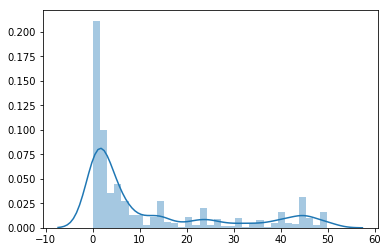

In [26]:
sns.distplot(cluster_list)

### Gaussian Mixture Model

In [27]:
from sklearn.mixture import GaussianMixture

dataset = np.array(cluster_list).reshape(-1,1)
gmm = GaussianMixture(n_components=2).fit(dataset).predict(dataset)

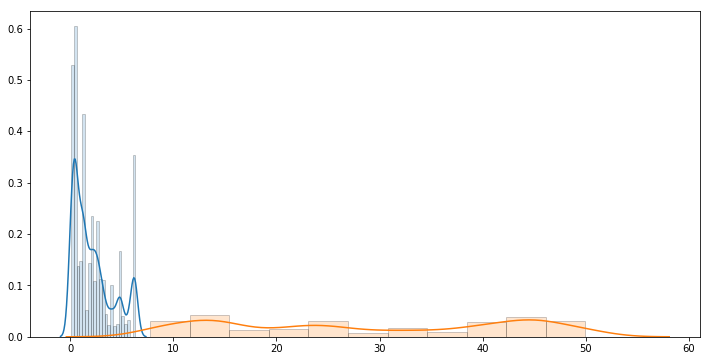

In [28]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize=(12, 6))


sns.distplot(dataset[gmm==0], hist_kws=hist_kws, ax=ax)
sns.distplot(dataset[gmm==1], hist_kws=hist_kws, ax=ax)
plt.show()

In [29]:
group0 = np.array(cluster_list)[gmm==0]
group1 = np.array(cluster_list)[gmm==1]

In [30]:
user_group_dict= {}
number = 0
for i,j in user_dict.items():
    if i not in user_group_dict:
        user_group_dict[i] = []
        
    for j1 in j:
        if j1 in group0:
            user_group_dict[i].append(0)
        elif j1 in group1:
            user_group_dict[i].append(1)
            
    if number <=50:
        print("user_id: ",i," group: ",user_group_dict[i])
    number +=1

user_id:  5749  group:  [1]
user_id:  2941  group:  [0, 0]
user_id:  10493  group:  [1, 0]
user_id:  8056  group:  [0, 1, 1, 0]
user_id:  9705  group:  [0, 0, 0]
user_id:  466  group:  [1, 0]
user_id:  8469  group:  [0]
user_id:  8127  group:  [1]
user_id:  115  group:  [1, 0, 1]
user_id:  9381  group:  [0]
user_id:  9059  group:  [0]
user_id:  6497  group:  [0, 0, 1]
user_id:  808  group:  [1]
user_id:  5091  group:  [0, 0, 0]
user_id:  4700  group:  [0, 1]
user_id:  535  group:  [1, 1]
user_id:  9664  group:  [1, 0]
user_id:  5165  group:  [0]
user_id:  7948  group:  [1]
user_id:  3669  group:  [0, 0, 1]
user_id:  1204  group:  [1]
user_id:  10647  group:  [1, 0]
user_id:  10972  group:  [1]
user_id:  10340  group:  [1, 0]
user_id:  3435  group:  [1, 1]
user_id:  9728  group:  [0]
user_id:  6082  group:  [0]
user_id:  2165  group:  [0]
user_id:  3714  group:  [0, 0, 0, 0, 1]
user_id:  7752  group:  [0]
user_id:  9817  group:  [0, 0]
user_id:  6343  group:  [0, 0]
user_id:  6711  grou

### KMeans Model

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(dataset).predict(dataset)

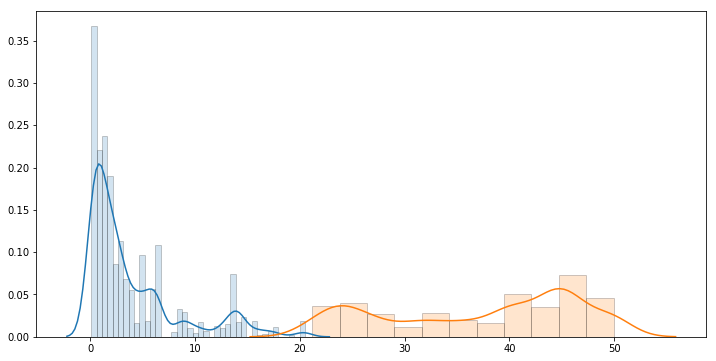

In [32]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize=(12, 6))


sns.distplot(dataset[kmeans==0], hist_kws=hist_kws, ax=ax)
sns.distplot(dataset[kmeans==1], hist_kws=hist_kws, ax=ax)
plt.show()

In [33]:
group0 = np.array(cluster_list)[kmeans==0]
group1 = np.array(cluster_list)[kmeans==1]

In [34]:
user_group_dict= {}
number = 0
for i,j in user_dict.items():
    if i not in user_group_dict:
        user_group_dict[i] = []
        
    for j1 in j:
        if j1 in group0:
            user_group_dict[i].append(0)
        elif j1 in group1:
            user_group_dict[i].append(1)
            
    if number <=50:
        print("user_id: ",i," group: ",user_group_dict[i])
    number +=1

user_id:  5749  group:  [1]
user_id:  2941  group:  [0, 0]
user_id:  10493  group:  [1, 0]
user_id:  8056  group:  [0, 0, 1, 0]
user_id:  9705  group:  [0, 0, 0]
user_id:  466  group:  [1, 0]
user_id:  8469  group:  [0]
user_id:  8127  group:  [0]
user_id:  115  group:  [1, 0, 1]
user_id:  9381  group:  [0]
user_id:  9059  group:  [0]
user_id:  6497  group:  [0, 0, 1]
user_id:  808  group:  [1]
user_id:  5091  group:  [0, 0, 0]
user_id:  4700  group:  [0, 1]
user_id:  535  group:  [1, 1]
user_id:  9664  group:  [1, 0]
user_id:  5165  group:  [0]
user_id:  7948  group:  [1]
user_id:  3669  group:  [0, 0, 1]
user_id:  1204  group:  [1]
user_id:  10647  group:  [1, 0]
user_id:  10972  group:  [1]
user_id:  10340  group:  [1, 0]
user_id:  3435  group:  [1, 1]
user_id:  9728  group:  [0]
user_id:  6082  group:  [0]
user_id:  2165  group:  [0]
user_id:  3714  group:  [0, 0, 0, 0, 1]
user_id:  7752  group:  [0]
user_id:  9817  group:  [0, 0]
user_id:  6343  group:  [0, 0]
user_id:  6711  grou